In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 100
fail_probability = [0, 0.05, 0.1]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=128.70670027734073, L=53.43958169299257, U=6931.471805599453
k=2, rel_gap=45.4805930238001, L=94.5055265175213, U=4392.672916560856
k=3, rel_gap=18.334140945520215, L=149.37273880843213, U=2887.9935855406043
k=4, rel_gap=7.619732022237711, L=227.06757400505867, U=1957.2616388632357
k=5, rel_gap=4.320836989859111, L=264.49306523897644, U=1407.3244850847648
k=6, rel_gap=3.18888449033955, L=335.9664102293466, U=1407.3244850847648
k=7, rel_gap=2.1027365712526938, L=366.8259782072327, U=1138.1643778691246
k=8, rel_gap=1.7725240797293231, L=410.5155970296358, U=1138.1643778691246
k=9, rel_gap=1.4404066070443675, L=466.38309148309577, U=1138.1643778691246
k=10, rel_gap=1.114989203910016, L=485.9488178287235, U=1027.7765033605854
k=11, rel_gap=0.9622573745637362, L=523.7725268272152, U=1027.7765033605854
k=12, rel_gap=0.8500616589820824, L=555.5363511106303, U=1027.7765033605854
k=13, rel_gap=0.72276

k=7, rel_gap=6.794829485447612, L=253.16040126991712, U=1973.342160366499
k=8, rel_gap=3.9708153259208645, L=282.0774567063171, U=1402.15494489254
k=9, rel_gap=3.1185619193814333, L=337.6619550025109, U=1390.6816694972285
k=10, rel_gap=1.9628646568997268, L=376.7691745825718, U=1116.3160711799849
k=11, rel_gap=1.609014202200016, L=427.86891318516643, U=1116.3160711799849
k=12, rel_gap=1.3669964956211924, L=471.61712036545276, U=1116.3160711799849
k=13, rel_gap=1.2222146588129268, L=492.12039240029367, U=1093.5971498927022
k=14, rel_gap=1.104511638745965, L=519.6441443984382, U=1093.5971498927022
k=15, rel_gap=0.8736542641655191, L=583.6707288042622, U=1093.5971498927022
k=16, rel_gap=0.7128379217166159, L=619.5394991309968, U=1061.1707481128897
k=17, rel_gap=0.5463100610414777, L=657.166910404827, U=1016.1838053425274
k=18, rel_gap=0.4547603176380654, L=681.8252120746762, U=991.8922620913972
k=19, rel_gap=0.3918169195729294, L=701.8033522416679, U=976.7817798629537
k=20, rel_gap=0.3305

k=14, rel_gap=0.9727827996749697, L=508.8479778243626, U=1003.846538301293
k=15, rel_gap=0.8402590782319201, L=545.4919636998973, U=1003.846538301293
k=16, rel_gap=0.7183897122917567, L=584.1786243951017, U=1003.846538301293
k=17, rel_gap=0.607668256251901, L=624.4114943475024, U=1003.846538301293
k=18, rel_gap=0.530434301502923, L=655.9226601988022, U=1003.846538301293
k=19, rel_gap=0.5034300974736513, L=667.7041652871966, U=1003.846538301293
k=20, rel_gap=0.47620459051574143, L=680.0185724599185, U=1003.846538301293
k=21, rel_gap=0.4453806537498959, L=694.5205304200754, U=1003.846538301293
k=22, rel_gap=0.4198812275091152, L=706.9933166609519, U=1003.846538301293
k=23, rel_gap=0.4041415105278717, L=714.9183545780281, U=1003.846538301293
k=24, rel_gap=0.3949673275409998, L=719.6201075697156, U=1003.846538301293
k=25, rel_gap=0.3869281998160897, L=723.7912809288943, U=1003.846538301293
k=26, rel_gap=0.3059980474771641, L=728.4927735134152, U=951.4101398097441
k=27, rel_gap=0.2888087629

# Centralized solution

In [3]:
h_cvx = ob.cvx_federated_learning(params=params)[2]

# Plot

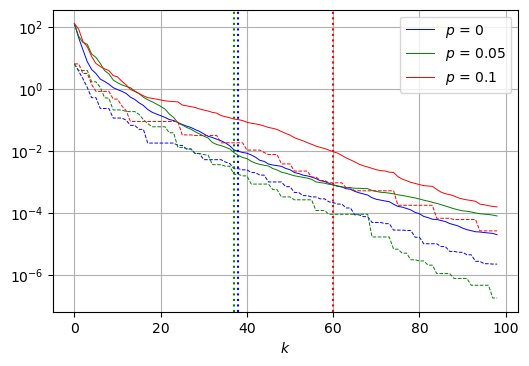

In [9]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)